In [1]:
import ace_tools_open as tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from utils import (generate_gaussian_A, 
                   generate_t_distribution_A, 
                   compute_matrices, 
                   compute_left_singular_vectors,
                   basic_matrix_multiplication,
                   compute_sampling_probabilities,
                   compute_sample_approximation_errors,
                   plot_probability_distribution,
                   plot_errors,
                   generate_random_projection_matrix,
                   compute_projection_approximation_errors,
                   run_sample_trials, 
                   compute_mean_std, 
                   plot_error_with_variability
                   )

In [2]:
n, d = 500, 50
seed = 1234  
c_values = list(range(10, 500, 20))       
s_values = np.linspace(0, 0.9, 10)        

A_GA = generate_gaussian_A(n, d, seed=seed)
A_T3 = generate_t_distribution_A(n, d, df=3, seed=seed)
A_T1 = generate_t_distribution_A(n, d, df=1, seed=seed)

U_A_GA = compute_left_singular_vectors(A_GA)
U_A_T3 = compute_left_singular_vectors(A_T3)
U_A_T1 = compute_left_singular_vectors(A_T1)

results_GA = compute_matrices(A_GA)
results_T3 = compute_matrices(A_T3)
results_T1 = compute_matrices(A_T1)

df_results = pd.DataFrame({
    "Dataset": ["GA", "T3", "T1"],
    "Frobenius Norm A^T A": [
        np.linalg.norm(results_GA[0], 'fro'),
        np.linalg.norm(results_T3[0], 'fro'),
        np.linalg.norm(results_T1[0], 'fro')
    ],
    "Frobenius Norm U_A^T U_A (SVD)": [
        np.linalg.norm(results_GA[1], 'fro'),
        np.linalg.norm(results_T3[1], 'fro'),
        np.linalg.norm(results_T1[1], 'fro')
    ],
    "Frobenius Norm U_A^T U_A (QR)": [
        np.linalg.norm(results_GA[2], 'fro'),
        np.linalg.norm(results_T3[2], 'fro'),
        np.linalg.norm(results_T1[2], 'fro')
    ]
})

tools.display_dataframe_to_user(name="Matrix Norm Comparisons", dataframe=df_results)

Matrix Norm Comparisons


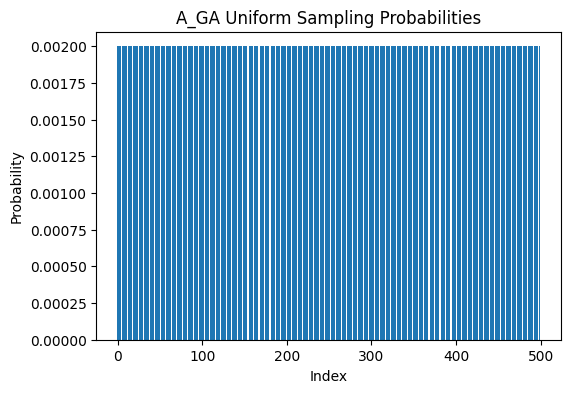

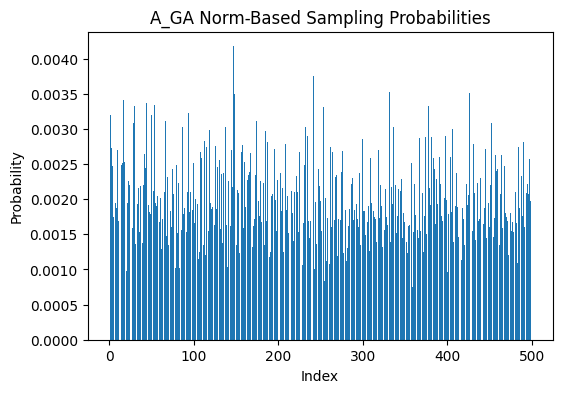

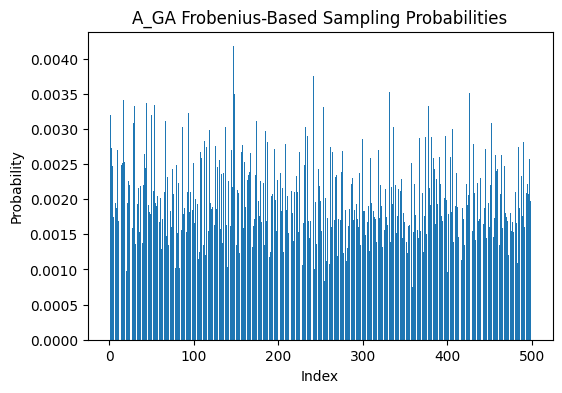

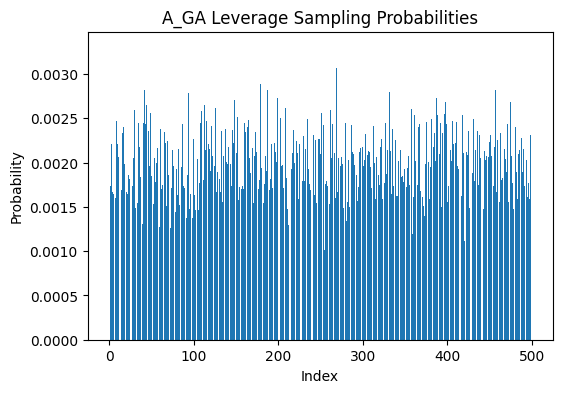

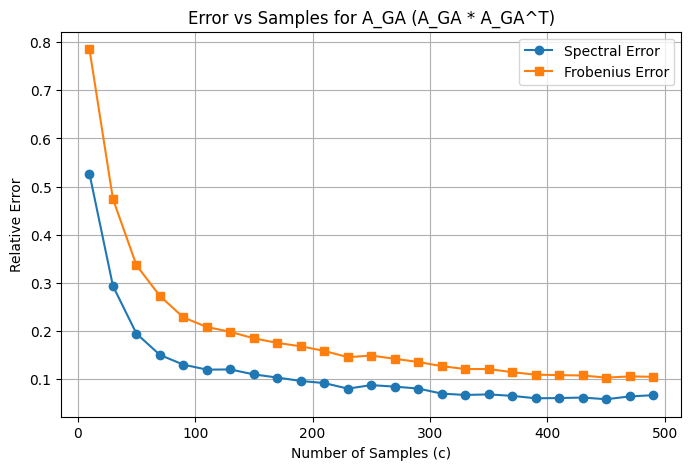

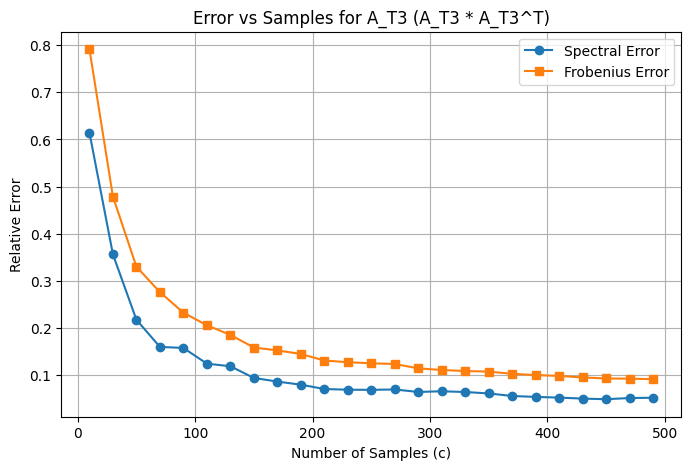

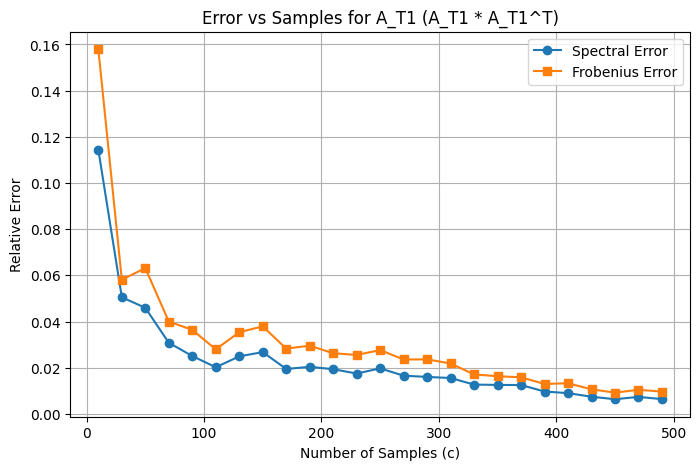

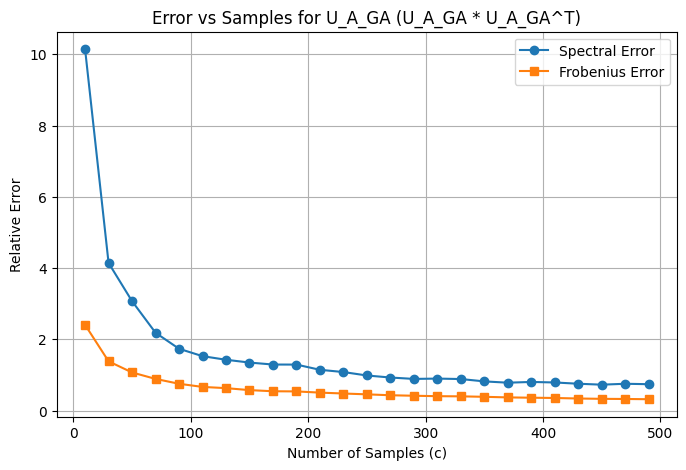

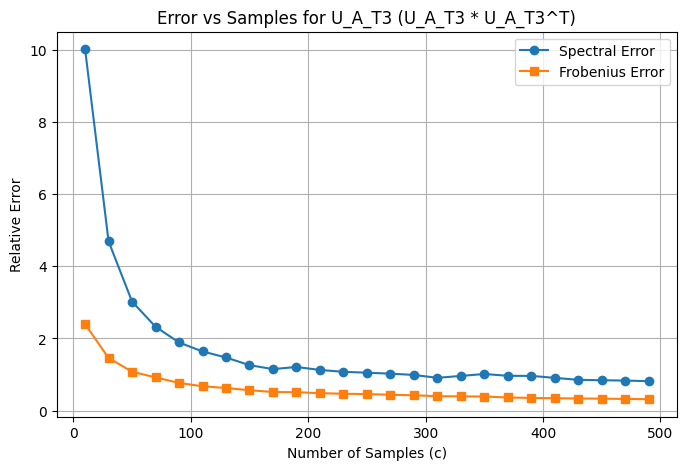

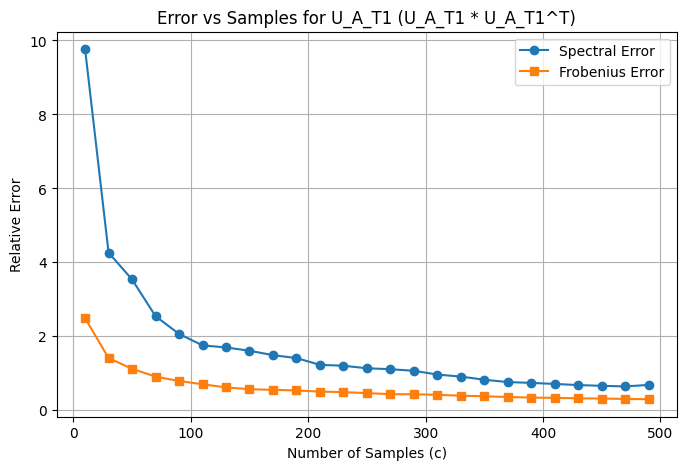

In [3]:
A_GA_p_uniform   = compute_sampling_probabilities(A_GA.T, A_GA, method="uniform")
A_GA_p_norm_based = compute_sampling_probabilities(A_GA.T, A_GA, method="norm_based")
A_GA_p_frobenius = compute_sampling_probabilities(A_GA.T, A_GA, method="frobenius_based")
A_GA_p_leverage = compute_sampling_probabilities(A_GA.T, A_GA, method="leverage")
plot_probability_distribution(A_GA_p_uniform, "A_GA Uniform Sampling Probabilities")
plot_probability_distribution(A_GA_p_norm_based, "A_GA Norm-Based Sampling Probabilities")
plot_probability_distribution(A_GA_p_frobenius, "A_GA Frobenius-Based Sampling Probabilities")
plot_probability_distribution(A_GA_p_leverage, "A_GA Leverage Sampling Probabilities")
# Define a range of sample sizes (c-values) to test:

# Compute and plot errors for A_GA approximating A_GA * A_GA^T using Frobenius-based probabilities:
spec_err_A_GA, fro_err_A_GA = compute_sample_approximation_errors(A_GA.T, A_GA, A_GA_p_frobenius, c_values)
plot_errors(c_values, spec_err_A_GA, fro_err_A_GA, "Error vs Samples for A_GA (A_GA * A_GA^T)")

# Similarly, for T3 and T1 matrices:
A_T3_p_frobenius = compute_sampling_probabilities(A_T3.T, A_T3, method="frobenius_based")
spec_err_A_T3, fro_err_A_T3 = compute_sample_approximation_errors(A_T3.T, A_T3, A_T3_p_frobenius, c_values)
plot_errors(c_values, spec_err_A_T3, fro_err_A_T3, "Error vs Samples for A_T3 (A_T3 * A_T3^T)")

A_T1_p_frobenius = compute_sampling_probabilities(A_T1.T, A_T1, method="frobenius_based")
spec_err_A_T1, fro_err_A_T1 = compute_sample_approximation_errors(A_T1.T, A_T1, A_T1_p_frobenius, c_values)
plot_errors(c_values, spec_err_A_T1, fro_err_A_T1, "Error vs Samples for A_T1 (A_T1 * A_T1^T)")

# For the matrices of left singular vectors (U_A), note that U_A^T U_A is exactly I.
# Thus, the exact product is the identity matrix.
U_A_GA_p_frobenius = compute_sampling_probabilities(U_A_GA.T, U_A_GA, method="frobenius_based")
spec_err_U_A_GA, fro_err_U_A_GA = compute_sample_approximation_errors(U_A_GA.T, U_A_GA, U_A_GA_p_frobenius, c_values)
plot_errors(c_values, spec_err_U_A_GA, fro_err_U_A_GA, "Error vs Samples for U_A_GA (U_A_GA * U_A_GA^T)")

U_A_T3_p_frobenius = compute_sampling_probabilities(U_A_T3.T, U_A_T3, method="frobenius_based")
spec_err_U_A_T3, fro_err_U_A_T3 = compute_sample_approximation_errors(U_A_T3.T, U_A_T3, U_A_T3_p_frobenius, c_values)
plot_errors(c_values, spec_err_U_A_T3, fro_err_U_A_T3, "Error vs Samples for U_A_T3 (U_A_T3 * U_A_T3^T)")

U_A_T1_p_frobenius = compute_sampling_probabilities(U_A_T1.T, U_A_T1, method="frobenius_based") 
spec_err_U_A_T1, fro_err_U_A_T1 = compute_sample_approximation_errors(U_A_T1.T, U_A_T1, U_A_T1_p_frobenius, c_values)
plot_errors(c_values, spec_err_U_A_T1, fro_err_U_A_T1, "Error vs Samples for U_A_T1 (U_A_T1 * U_A_T1^T)")

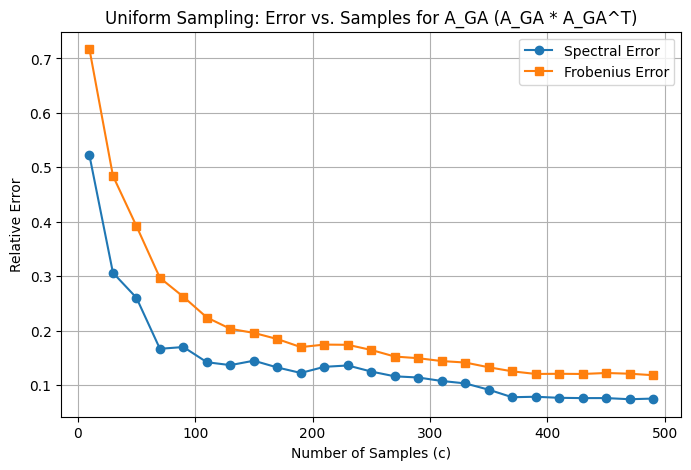

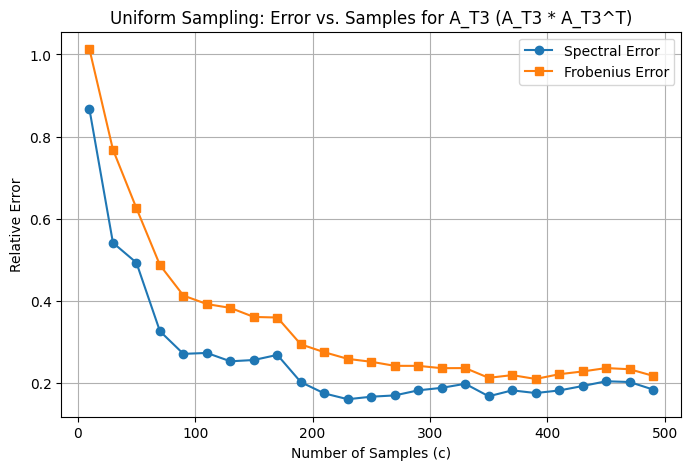

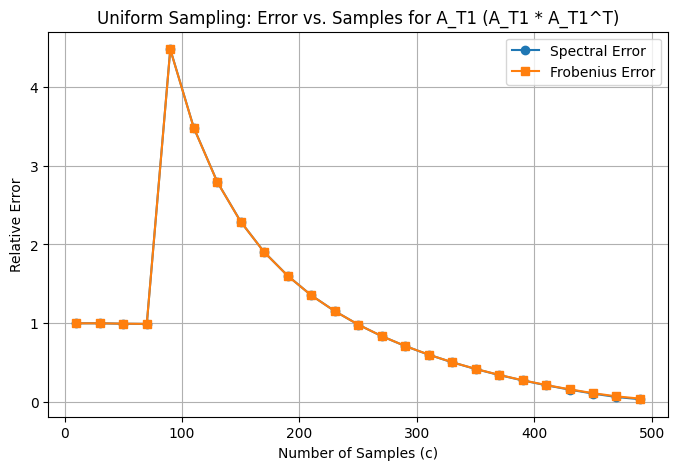

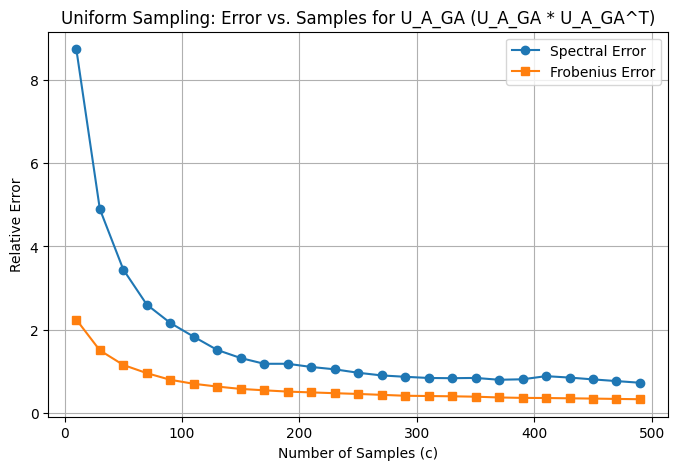

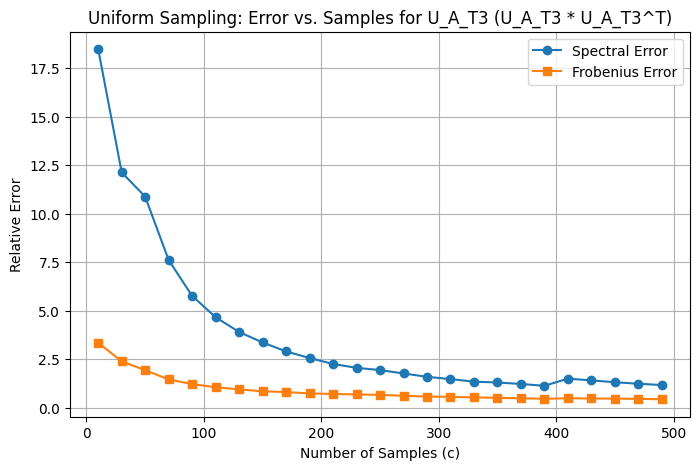

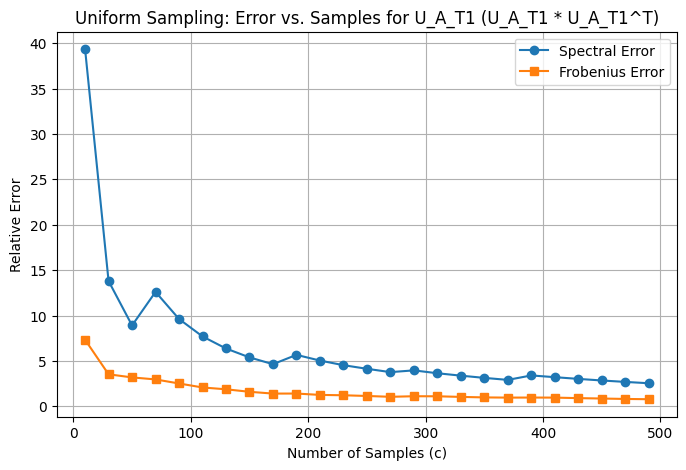

In [4]:
#############################
# Approximation for A_GA:
#############################
# Uniform probabilities for approximating A_GA*A_GA^T.
A_GA_p_uniform = compute_sampling_probabilities(A_GA.T, A_GA, method="uniform")
spec_err_A_GA_uniform, fro_err_A_GA_uniform = compute_sample_approximation_errors(A_GA.T, A_GA, A_GA_p_uniform, c_values)
plot_errors(c_values, spec_err_A_GA_uniform, fro_err_A_GA_uniform,
            "Uniform Sampling: Error vs. Samples for A_GA (A_GA * A_GA^T)")

#############################
# Approximation for A_T3:
#############################
A_T3_p_uniform = compute_sampling_probabilities(A_T3.T, A_T3, method="uniform")
spec_err_A_T3_uniform, fro_err_A_T3_uniform = compute_sample_approximation_errors(A_T3.T, A_T3, A_T3_p_uniform, c_values)
plot_errors(c_values, spec_err_A_T3_uniform, fro_err_A_T3_uniform,
            "Uniform Sampling: Error vs. Samples for A_T3 (A_T3 * A_T3^T)")

#############################
# Approximation for A_T1:
#############################
A_T1_p_uniform = compute_sampling_probabilities(A_T1.T, A_T1, method="uniform")
spec_err_A_T1_uniform, fro_err_A_T1_uniform = compute_sample_approximation_errors(A_T1.T, A_T1, A_T1_p_uniform, c_values)
plot_errors(c_values, spec_err_A_T1_uniform, fro_err_A_T1_uniform,
            "Uniform Sampling: Error vs. Samples for A_T1 (A_T1 * A_T1^T)")

#############################
# Approximation for U_A_GA:
#############################
U_A_GA_p_uniform = compute_sampling_probabilities(U_A_GA.T, U_A_GA, method="uniform")
spec_err_U_A_GA_uniform, fro_err_U_A_GA_uniform = compute_sample_approximation_errors(U_A_GA.T, U_A_GA, U_A_GA_p_uniform, c_values)
plot_errors(c_values, spec_err_U_A_GA_uniform, fro_err_U_A_GA_uniform,
            "Uniform Sampling: Error vs. Samples for U_A_GA (U_A_GA * U_A_GA^T)")

#############################
# Approximation for U_A_T3:
#############################
U_A_T3_p_uniform = compute_sampling_probabilities(U_A_T3.T, U_A_T3, method="uniform")
spec_err_U_A_T3_uniform, fro_err_U_A_T3_uniform = compute_sample_approximation_errors(U_A_T3.T, U_A_T3, U_A_T3_p_uniform, c_values)
plot_errors(c_values, spec_err_U_A_T3_uniform, fro_err_U_A_T3_uniform,
            "Uniform Sampling: Error vs. Samples for U_A_T3 (U_A_T3 * U_A_T3^T)")

#############################
# Approximation for U_A_T1:
#############################
U_A_T1_p_uniform = compute_sampling_probabilities(U_A_T1.T, U_A_T1, method="uniform")
spec_err_U_A_T1_uniform, fro_err_U_A_T1_uniform = compute_sample_approximation_errors(U_A_T1.T, U_A_T1, U_A_T1_p_uniform, c_values)
plot_errors(c_values, spec_err_U_A_T1_uniform, fro_err_U_A_T1_uniform,
            "Uniform Sampling: Error vs. Samples for U_A_T1 (U_A_T1 * U_A_T1^T)")

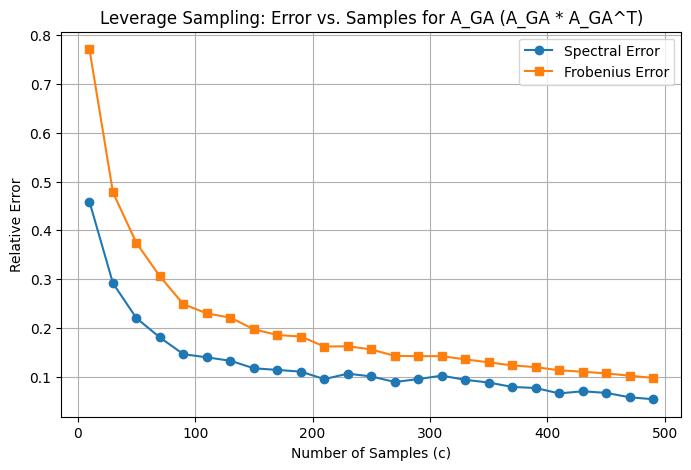

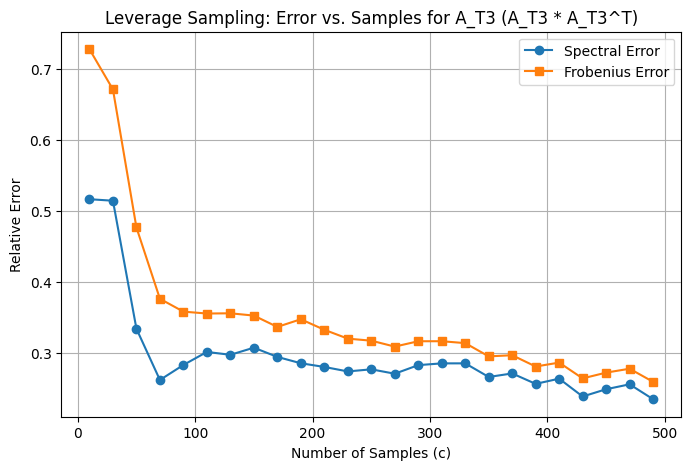

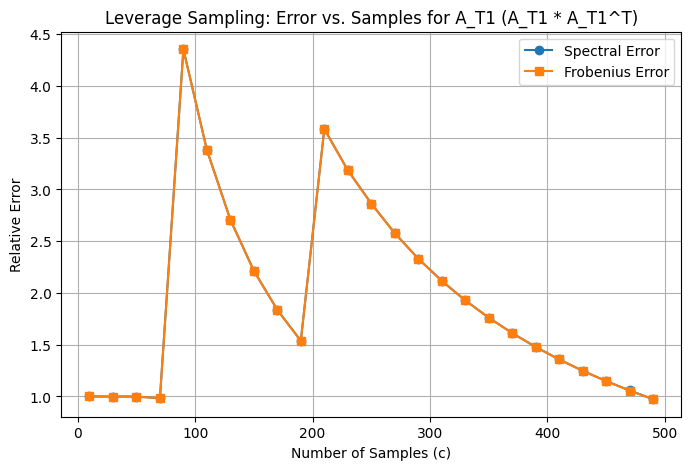

In [5]:
A_GA_p_leverage = compute_sampling_probabilities(A_GA.T, A_GA, method="leverage")
spec_err_A_GA_leverage, fro_err_A_GA_leverage = compute_sample_approximation_errors(A_GA.T,A_GA, A_GA_p_leverage, c_values)
plot_errors(c_values, spec_err_A_GA_leverage, fro_err_A_GA_leverage,
            "Leverage Sampling: Error vs. Samples for A_GA (A_GA * A_GA^T)")

#############################
# Approximation for A_T3:
#############################
A_T3_p_leverage = compute_sampling_probabilities(A_T3.T, A_T3, method="leverage")
spec_err_A_T3_leverage, fro_err_A_T3_leverage = compute_sample_approximation_errors(A_T3.T, A_T3, A_GA_p_leverage, c_values)
plot_errors(c_values, spec_err_A_T3_leverage, fro_err_A_T3_leverage,
            "Leverage Sampling: Error vs. Samples for A_T3 (A_T3 * A_T3^T)")

#############################
# Approximation for A_T1:
#############################
A_T1_p_leverage = compute_sampling_probabilities(A_T1.T, A_T1, method="leverage")
spec_err_A_T1_leverage, fro_err_A_T1_leverage = compute_sample_approximation_errors(A_T1.T, A_T1, A_GA_p_leverage, c_values)
plot_errors(c_values, spec_err_A_T1_leverage, fro_err_A_T1_leverage,
            "Leverage Sampling: Error vs. Samples for A_T1 (A_T1 * A_T1^T)")

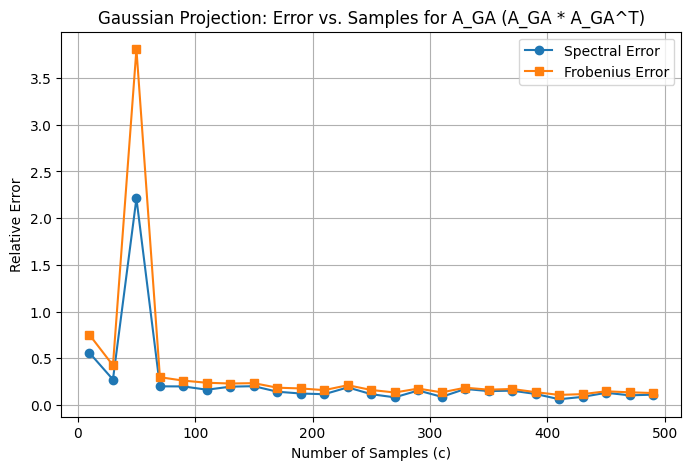

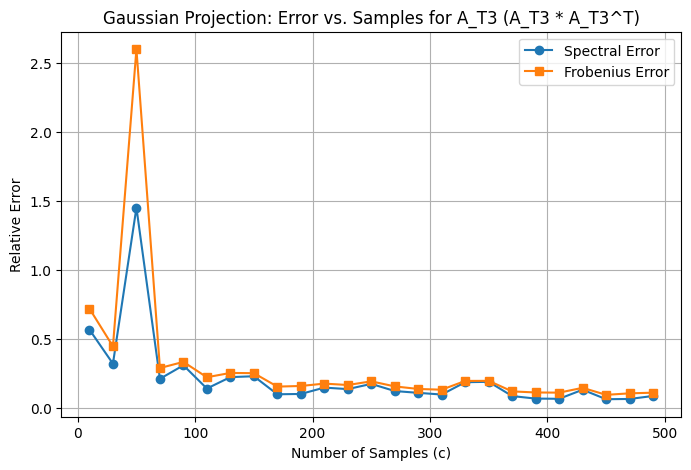

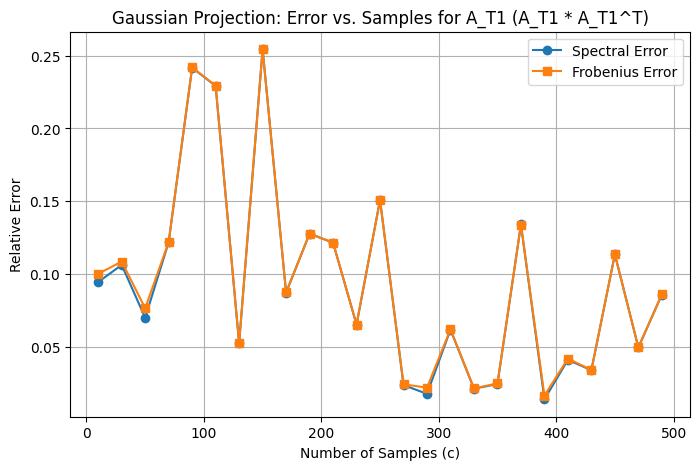

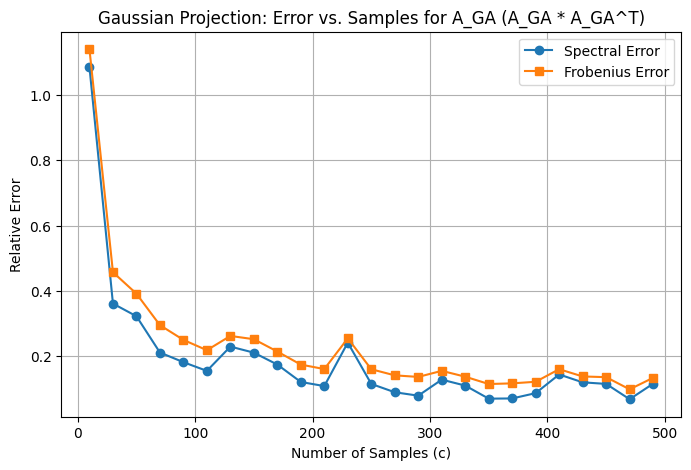

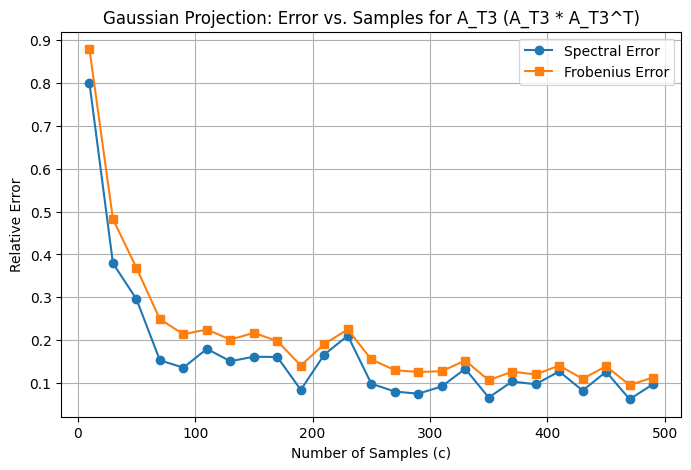

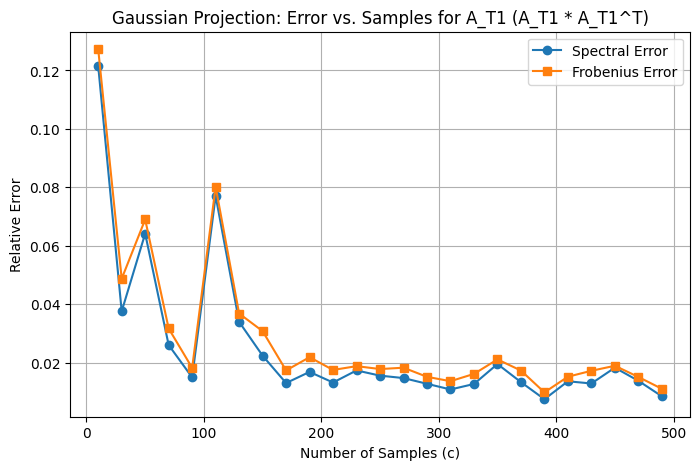

In [6]:
#############################
# Approximation for A_GA:
#############################
gaussian_A_GA_projection_spec_errors, gaussian_A_GA_projection_fro_errors = compute_projection_approximation_errors(A_GA.T, A_GA, c_values, method="gaussian")
plot_errors(c_values, gaussian_A_GA_projection_spec_errors, gaussian_A_GA_projection_fro_errors,
            "Gaussian Projection: Error vs. Samples for A_GA (A_GA * A_GA^T)")

#############################
# Approximation for A_T3:
#############################
gaussian_t3_projection_spec_errors, gaussian_t3_projection_fro_errors = compute_projection_approximation_errors(A_T3.T, A_T3, c_values, method="gaussian")
plot_errors(c_values, gaussian_t3_projection_spec_errors, gaussian_t3_projection_fro_errors,
            "Gaussian Projection: Error vs. Samples for A_T3 (A_T3 * A_T3^T)")

#############################
# Approximation for A_T1:
#############################
gaussian_t1_projection_spec_errors, gaussian_t1_projection_fro_errors = compute_projection_approximation_errors(A_T1.T, A_T1, c_values, method="gaussian")
plot_errors(c_values, gaussian_t1_projection_spec_errors, gaussian_t1_projection_fro_errors,
            "Gaussian Projection: Error vs. Samples for A_T1 (A_T1 * A_T1^T)")

#############################
# Approximation for A_GA:
#############################
sign_A_GA_projection_spec_errors, sign_A_GA_projection_fro_errors = compute_projection_approximation_errors(A_GA.T, A_GA, c_values, method="sign")
plot_errors(c_values, sign_A_GA_projection_spec_errors, sign_A_GA_projection_fro_errors,
            "Gaussian Projection: Error vs. Samples for A_GA (A_GA * A_GA^T)")

#############################
# Approximation for A_T3:
#############################
sign_t3_projection_spec_errors, sign_t3_projection_fro_errors = compute_projection_approximation_errors(A_T3.T, A_T3, c_values, method="sign")
plot_errors(c_values, sign_t3_projection_spec_errors, sign_t3_projection_fro_errors,
            "Gaussian Projection: Error vs. Samples for A_T3 (A_T3 * A_T3^T)")

#############################
# Approximation for A_T1:
#############################
sign_t1_projection_spec_errors, sign_t1_projection_fro_errors = compute_projection_approximation_errors(A_T1.T, A_T1, c_values, method="sign")
plot_errors(c_values, sign_t1_projection_spec_errors, sign_t1_projection_fro_errors,
            "Gaussian Projection: Error vs. Samples for A_T1 (A_T1 * A_T1^T)")

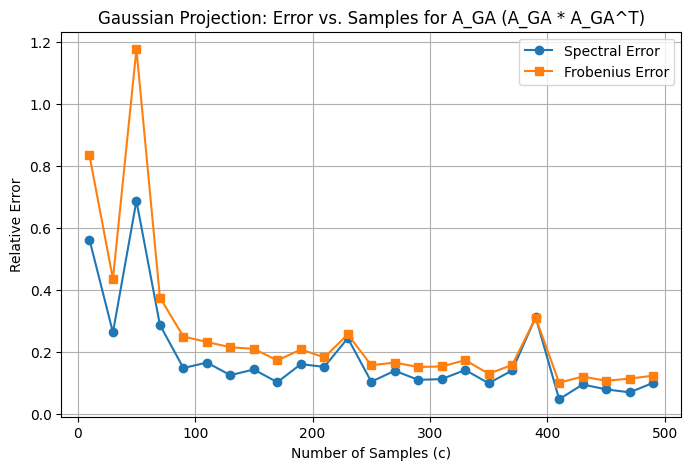

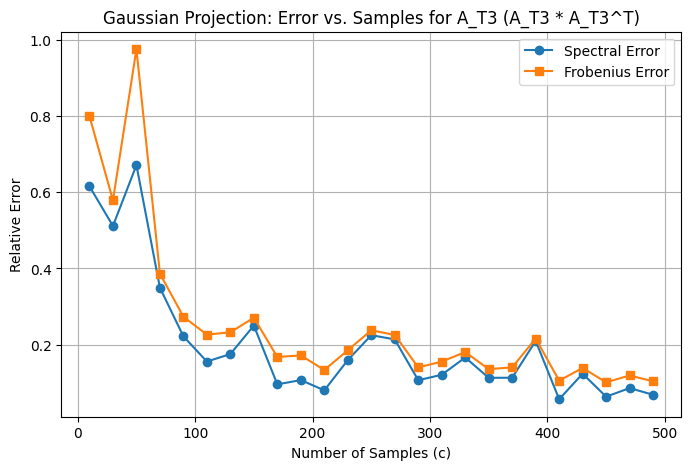

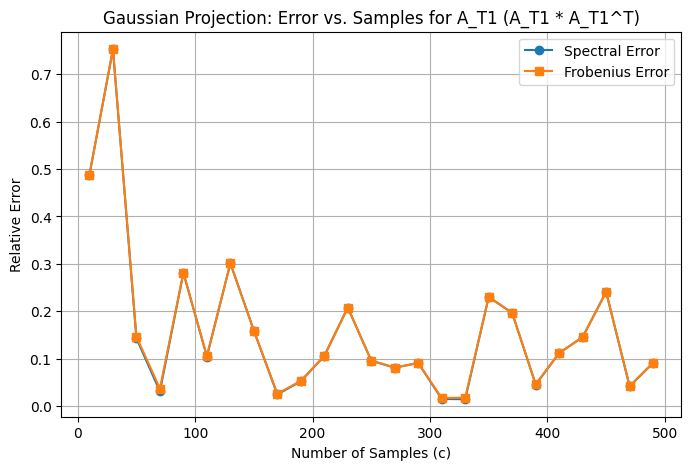

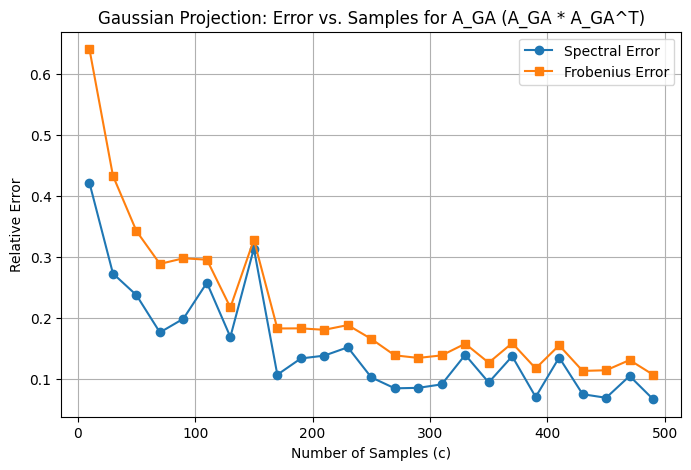

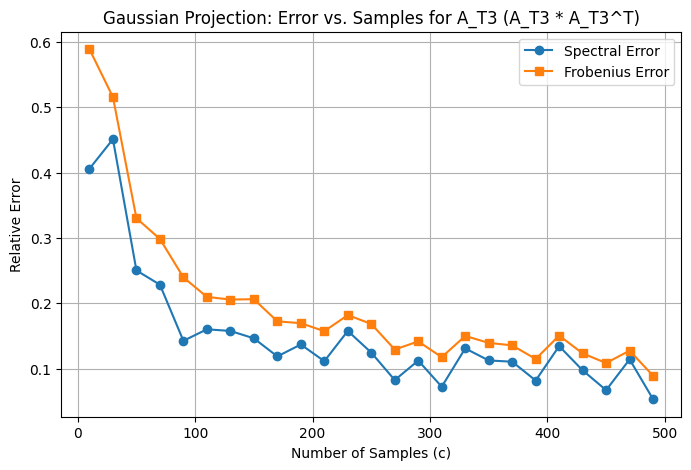

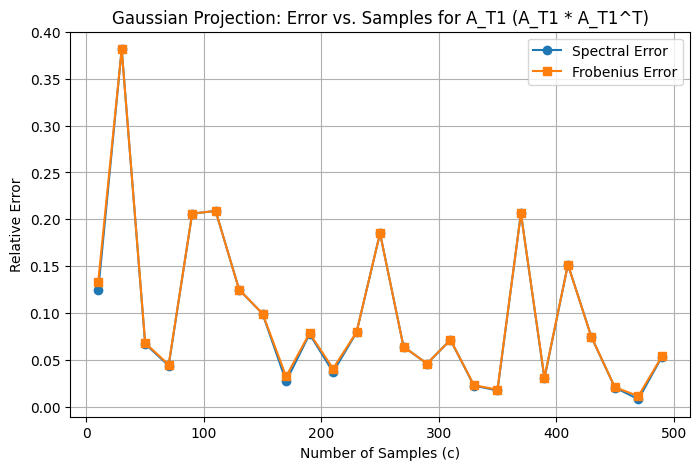

In [7]:
s = 0.7

#############################
# Approximation for A_GA:
#############################
gaussian_A_GA_projection_spec_errors, gaussian_A_GA_projection_fro_errors = compute_projection_approximation_errors(A_GA.T, A_GA, c_values, sparsity=s, method="gaussian")
plot_errors(c_values, gaussian_A_GA_projection_spec_errors, gaussian_A_GA_projection_fro_errors,
            "Gaussian Projection: Error vs. Samples for A_GA (A_GA * A_GA^T)")

#############################
# Approximation for A_T3:
#############################
gaussian_t3_projection_spec_errors, gaussian_t3_projection_fro_errors = compute_projection_approximation_errors(A_T3.T, A_T3, c_values,sparsity=s, method="gaussian")
plot_errors(c_values, gaussian_t3_projection_spec_errors, gaussian_t3_projection_fro_errors,
            "Gaussian Projection: Error vs. Samples for A_T3 (A_T3 * A_T3^T)")

#############################
# Approximation for A_T1:
#############################
gaussian_t1_projection_spec_errors, gaussian_t1_projection_fro_errors = compute_projection_approximation_errors(A_T1.T, A_T1, c_values,sparsity=s, method="gaussian")
plot_errors(c_values, gaussian_t1_projection_spec_errors, gaussian_t1_projection_fro_errors,
            "Gaussian Projection: Error vs. Samples for A_T1 (A_T1 * A_T1^T)")

#############################
# Approximation for A_GA:
#############################
sign_A_GA_projection_spec_errors, sign_A_GA_projection_fro_errors = compute_projection_approximation_errors(A_GA.T, A_GA, c_values,sparsity=s, method="sign")
plot_errors(c_values, sign_A_GA_projection_spec_errors, sign_A_GA_projection_fro_errors,
            "Gaussian Projection: Error vs. Samples for A_GA (A_GA * A_GA^T)")

#############################
# Approximation for A_T3:
#############################
sign_t3_projection_spec_errors, sign_t3_projection_fro_errors = compute_projection_approximation_errors(A_T3.T, A_T3, c_values,sparsity=s, method="sign")
plot_errors(c_values, sign_t3_projection_spec_errors, sign_t3_projection_fro_errors,
            "Gaussian Projection: Error vs. Samples for A_T3 (A_T3 * A_T3^T)")

#############################
# Approximation for A_T1:
#############################
sign_t1_projection_spec_errors, sign_t1_projection_fro_errors = compute_projection_approximation_errors(A_T1.T, A_T1, c_values,sparsity=s, method="sign")
plot_errors(c_values, sign_t1_projection_spec_errors, sign_t1_projection_fro_errors,
            "Gaussian Projection: Error vs. Samples for A_T1 (A_T1 * A_T1^T)")

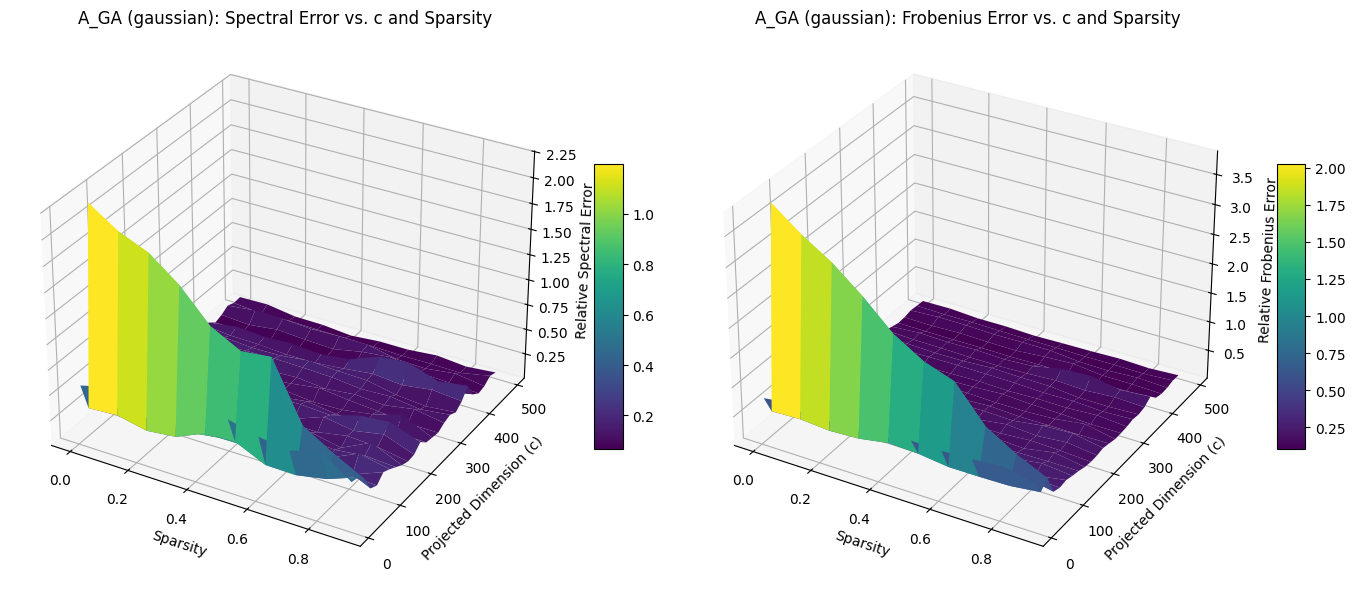

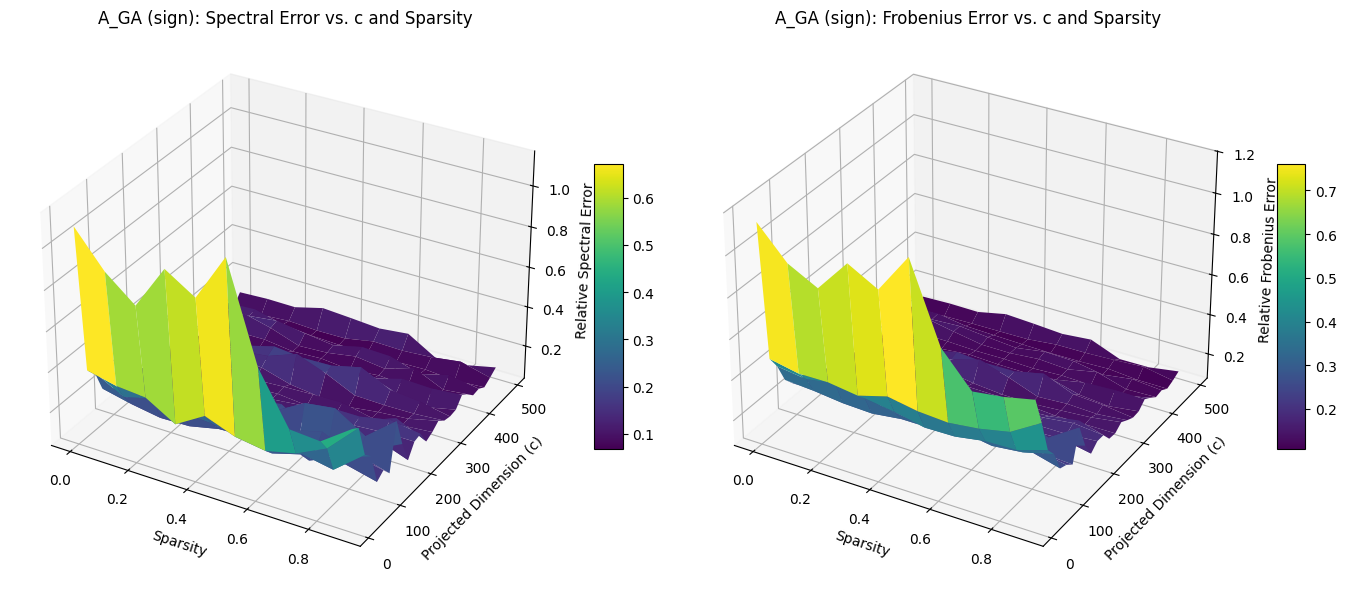

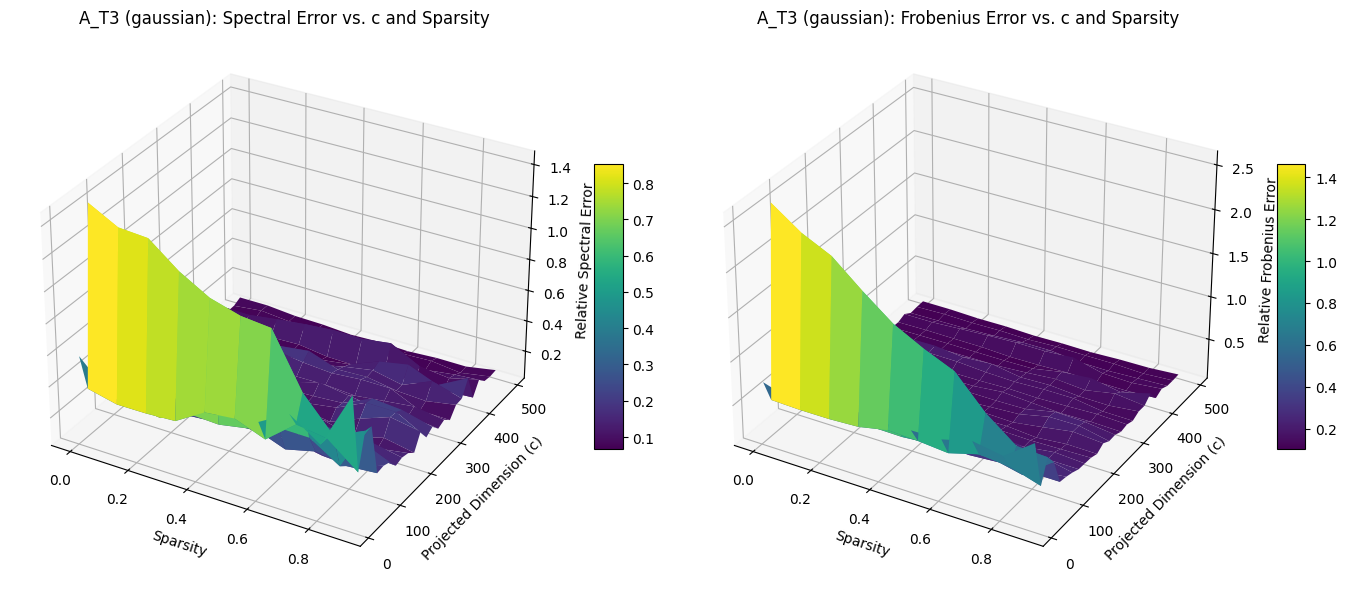

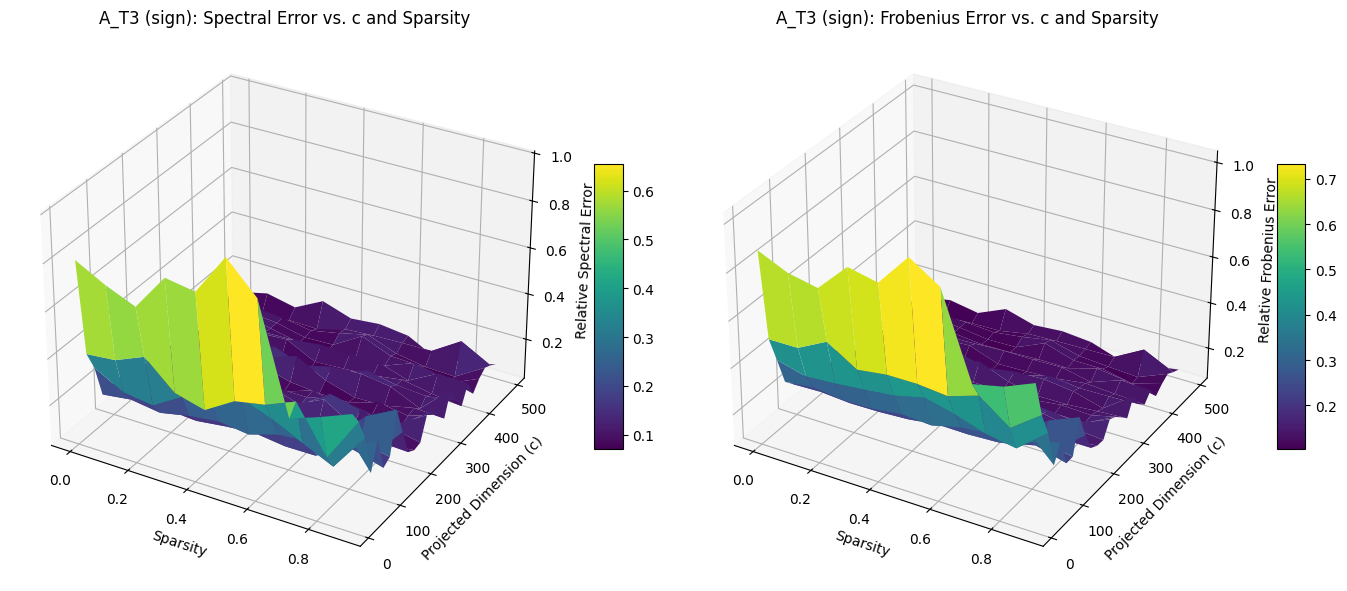

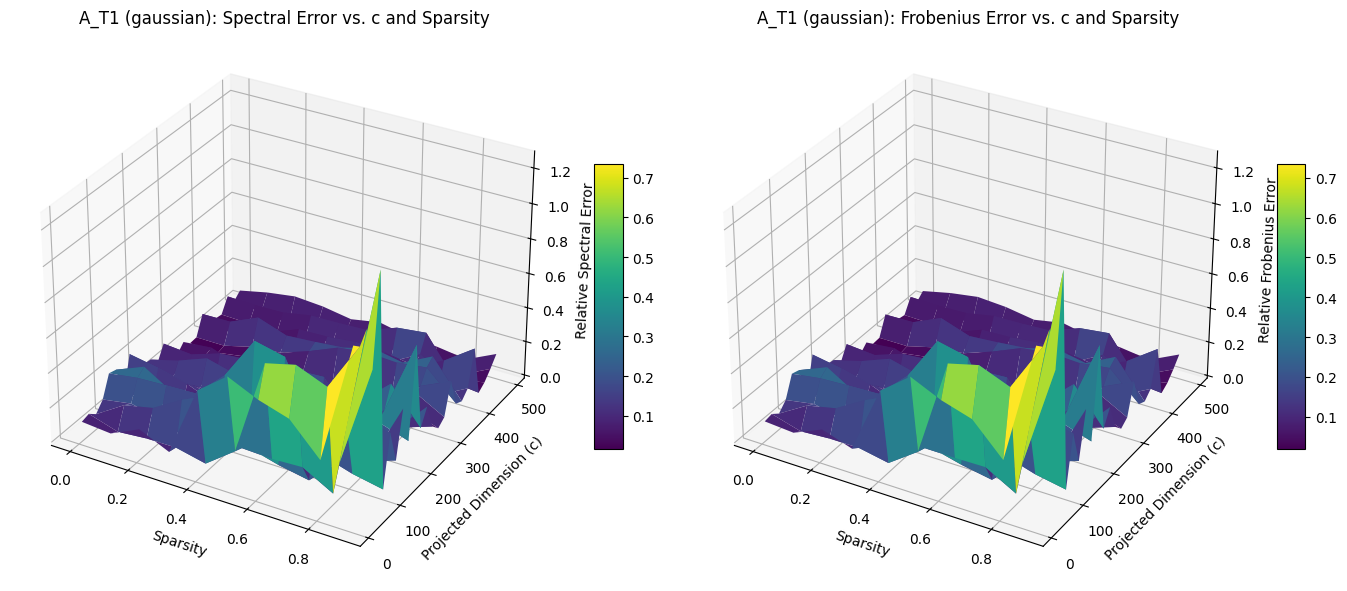

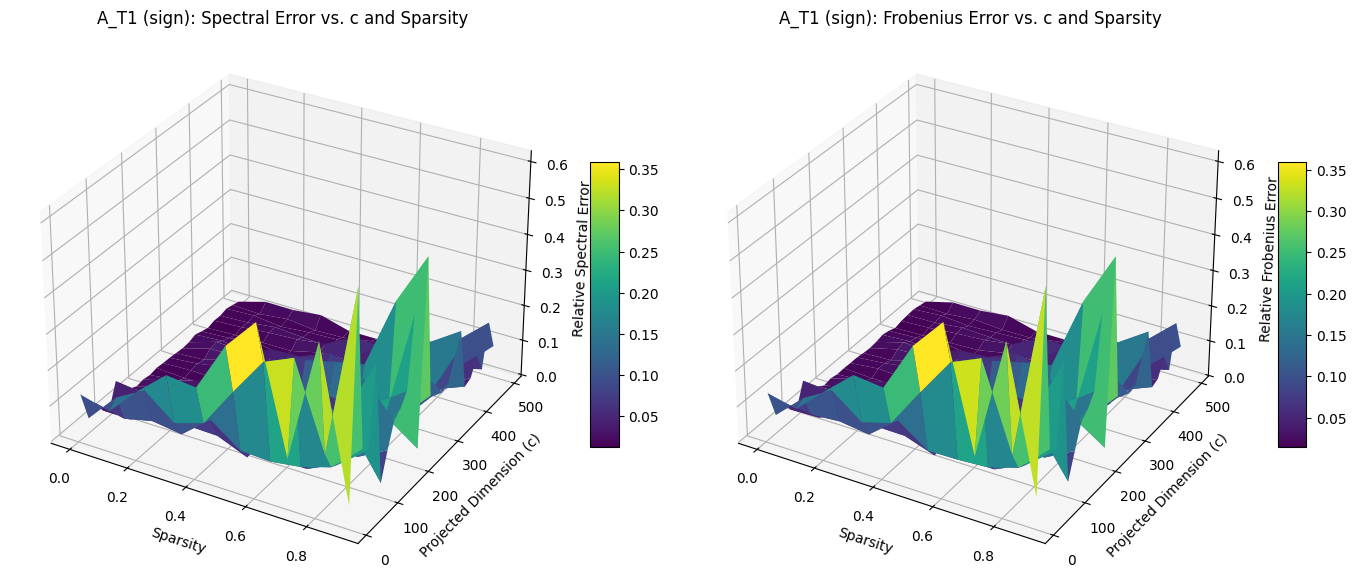

In [8]:
matrices = {
    "A_GA": A_GA,
    "A_T3": A_T3,
    "A_T1": A_T1
}

# Define the projection methods to compare.
methods = ["gaussian", "sign"]

# Loop over each matrix and each projection method.
for matrix_name, A in matrices.items():
    for method in methods:
        # Initialize error grids (rows: different sparsity values, columns: different c values)
        error_grid_spec = np.zeros((len(s_values), len(c_values)))
        error_grid_fro = np.zeros((len(s_values), len(c_values)))
        
        for i, s in enumerate(s_values):
            # We approximate A^T A. We pass A.T as the first argument and A as the second,
            # so that the projection is applied to the columns of A.
            spec_errors, fro_errors = compute_projection_approximation_errors(A.T, A, c_values,
                                                                              sparsity=s, method=method)
            error_grid_spec[i, :] = spec_errors
            error_grid_fro[i, :] = fro_errors

        # Create meshgrids for plotting: 
        # X-axis: sparsity, Y-axis: projected dimension c.
        S, C = np.meshgrid(s_values, c_values, indexing='ij')
        
        # Create a new figure for this combination.
        fig = plt.figure(figsize=(14, 6))
        
        # Plot the Spectral Norm Error surface.
        ax1 = fig.add_subplot(121, projection='3d')
        surf1 = ax1.plot_surface(S, C, error_grid_spec, cmap='viridis', edgecolor='none')
        ax1.set_xlabel('Sparsity')
        ax1.set_ylabel('Projected Dimension (c)')
        ax1.set_zlabel('Relative Spectral Error')
        ax1.set_title(f'{matrix_name} ({method}): Spectral Error vs. c and Sparsity')
        fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=10)
        
        # Plot the Frobenius Norm Error surface.
        ax2 = fig.add_subplot(122, projection='3d')
        surf2 = ax2.plot_surface(S, C, error_grid_fro, cmap='viridis', edgecolor='none')
        ax2.set_xlabel('Sparsity')
        ax2.set_ylabel('Projected Dimension (c)')
        ax2.set_zlabel('Relative Frobenius Error')
        ax2.set_title(f'{matrix_name} ({method}): Frobenius Error vs. c and Sparsity')
        fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=10)
        
        plt.tight_layout()
        plt.show()


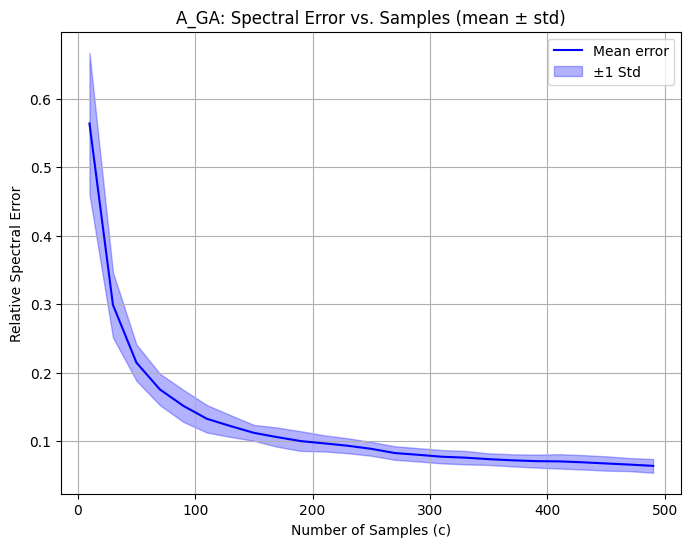

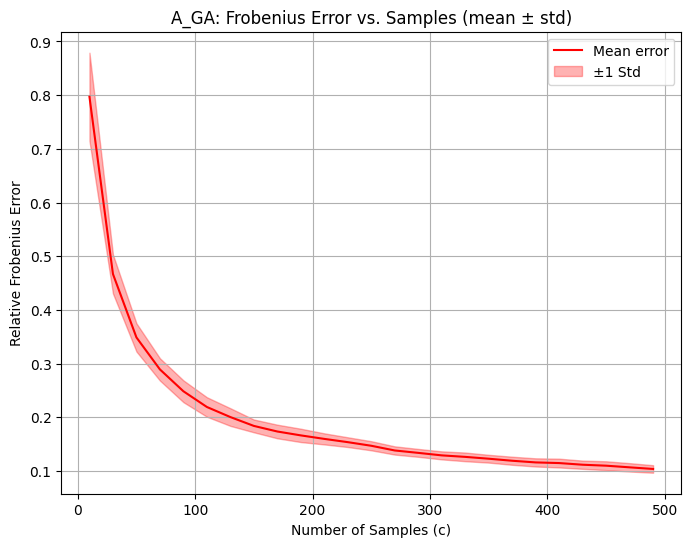

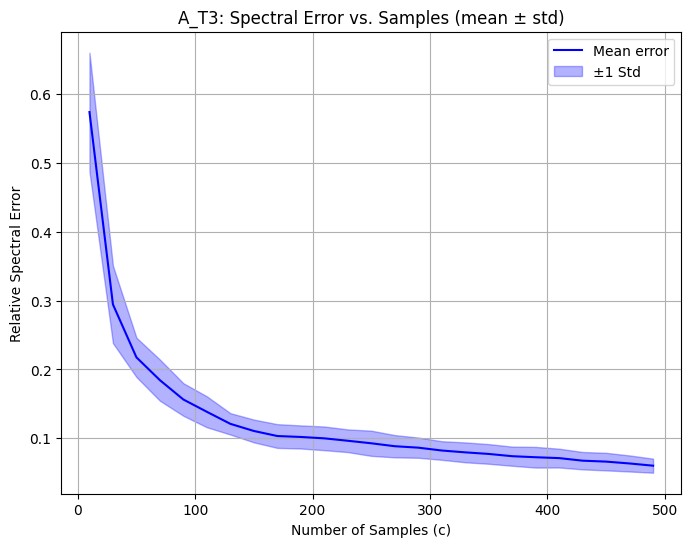

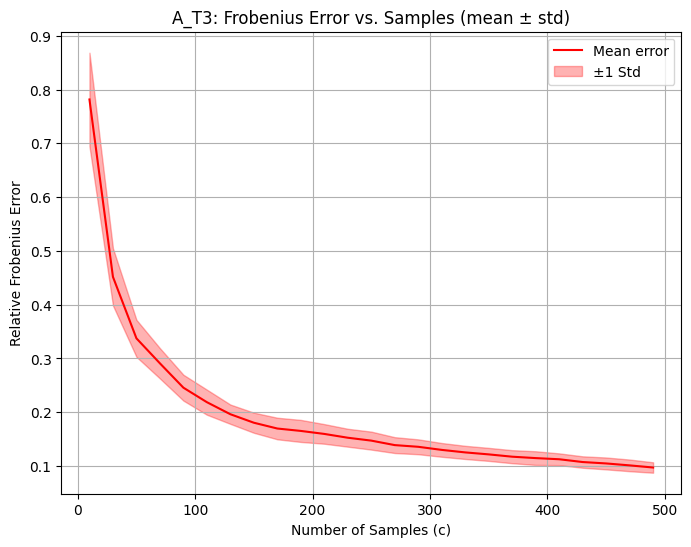

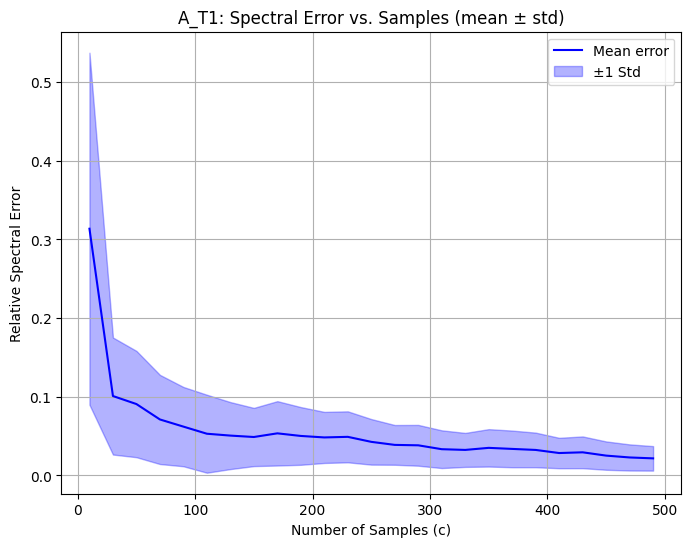

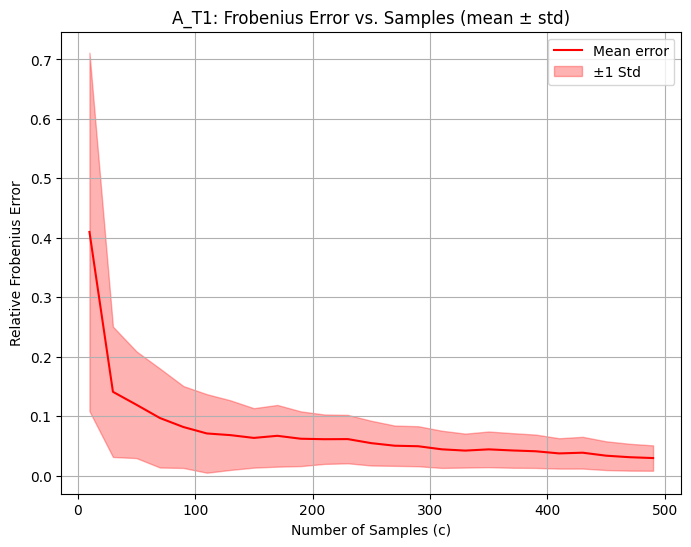

In [9]:
n, d = 500, 50
seed = 1234  
c_values = list(range(10, 500, 20))   # e.g., 10, 30, 50, ..., 490
num_trials = 20



ga_params = {"n": n, "d": d} 
spec_errs_GA, fro_errs_GA = run_sample_trials(generate_gaussian_A, ga_params, c_values, num_trials, sampling_method="frobenius_based", seed=seed)

t3_params = {"n": n, "d": d, "df": 3}
spec_errs_T3, fro_errs_T3 = run_sample_trials(generate_t_distribution_A, t3_params, c_values, num_trials, sampling_method="frobenius_based")

t1_params = {"n": n, "d": d, "df": 1}
spec_errs_T1, fro_errs_T1 = run_sample_trials(generate_t_distribution_A, t1_params, c_values, num_trials, sampling_method="frobenius_based")


mean_spec_GA, std_spec_GA = compute_mean_std(spec_errs_GA)
mean_fro_GA, std_fro_GA = compute_mean_std(fro_errs_GA)

mean_spec_T3, std_spec_T3 = compute_mean_std(spec_errs_T3)
mean_fro_T3, std_fro_T3 = compute_mean_std(fro_errs_T3)

mean_spec_T1, std_spec_T1 = compute_mean_std(spec_errs_T1)
mean_fro_T1, std_fro_T1 = compute_mean_std(fro_errs_T1)


plot_error_with_variability(c_values, mean_spec_GA, std_spec_GA, 'Relative Spectral Error',
                              'A_GA: Spectral Error vs. Samples (mean ± std)', 'blue')
plot_error_with_variability(c_values, mean_fro_GA, std_fro_GA, 'Relative Frobenius Error',
                              'A_GA: Frobenius Error vs. Samples (mean ± std)', 'red')


plot_error_with_variability(c_values, mean_spec_T3, std_spec_T3, 'Relative Spectral Error',
                              'A_T3: Spectral Error vs. Samples (mean ± std)', 'blue')
plot_error_with_variability(c_values, mean_fro_T3, std_fro_T3, 'Relative Frobenius Error',
                              'A_T3: Frobenius Error vs. Samples (mean ± std)', 'red')

plot_error_with_variability(c_values, mean_spec_T1, std_spec_T1, 'Relative Spectral Error',
                              'A_T1: Spectral Error vs. Samples (mean ± std)', 'blue')
plot_error_with_variability(c_values, mean_fro_T1, std_fro_T1, 'Relative Frobenius Error',
                              'A_T1: Frobenius Error vs. Samples (mean ± std)', 'red')
